In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization

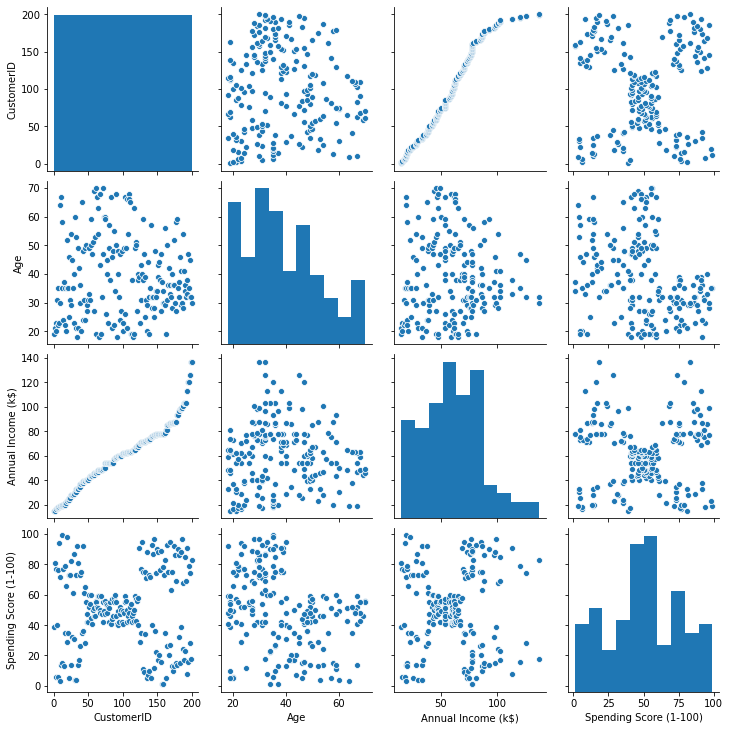

In [5]:
sns.pairplot(df)

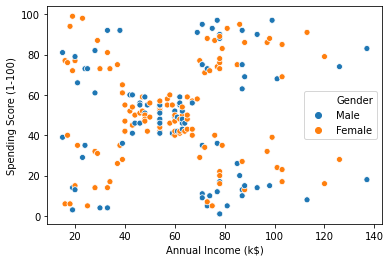

In [6]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['Gender'])

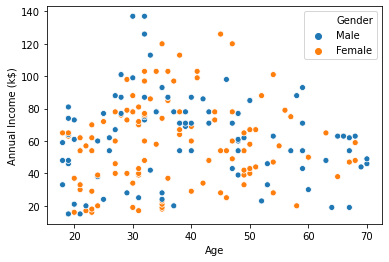

In [7]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'],hue=df['Gender'])

Text(0.5, 0, 'Annual Income (k$)')

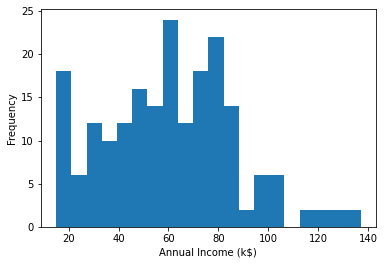

In [8]:
df['Annual Income (k$)'].plot.hist(bins=20)
plt.xlabel('Annual Income (k$)')

Text(0.5, 0, 'Spending Score (1-100)')

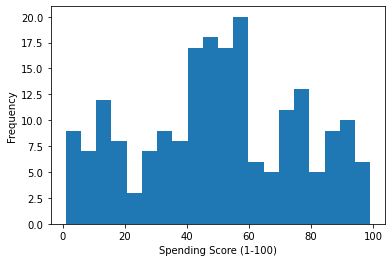

In [9]:
df['Spending Score (1-100)'].plot.hist(bins=20)
plt.xlabel('Spending Score (1-100)')

## Data Preprocessing

In [10]:
gender = lambda x: 0 if x=='Male' else 1

In [11]:
df['Gender'] = df['Gender'].apply(gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


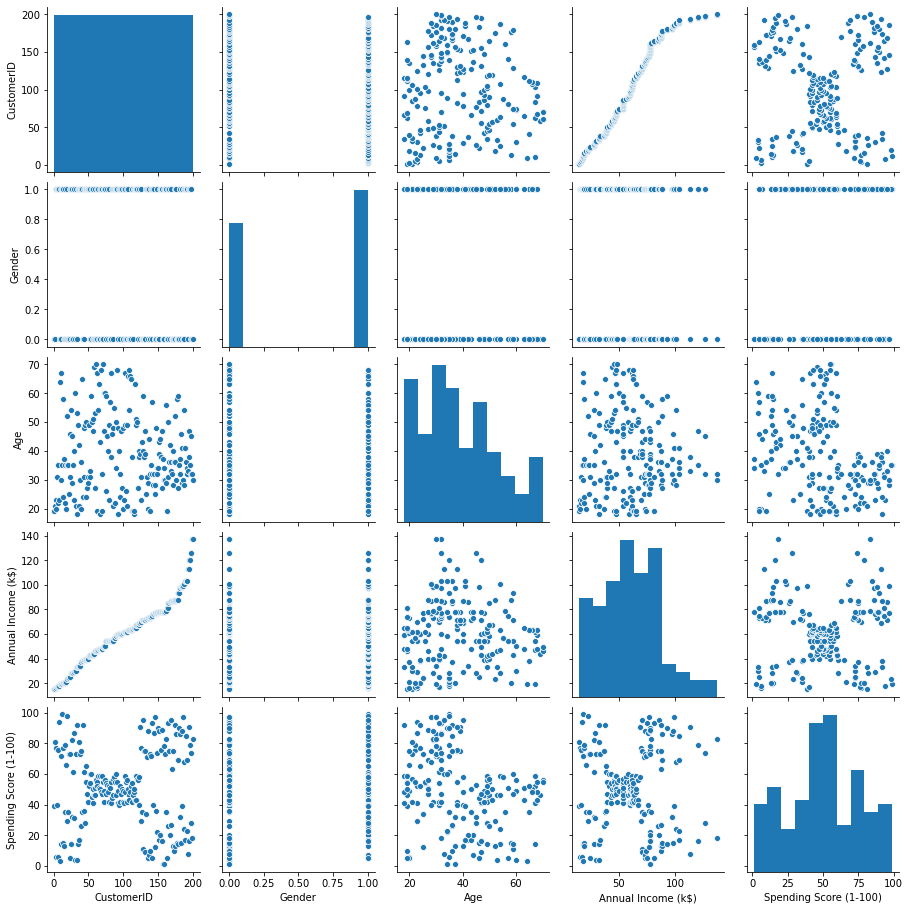

In [12]:
sns.pairplot(df)

## Model Deployment

In [13]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Sum of squared distance')

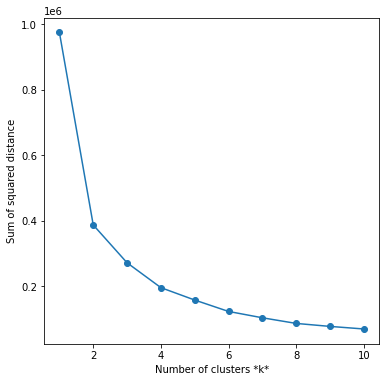

In [14]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(range(1,11), sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [15]:
km = KMeans(n_clusters=6) #chosen 6 clusters
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

In [16]:
labels

array([5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 3, 0, 3, 2, 3, 2, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

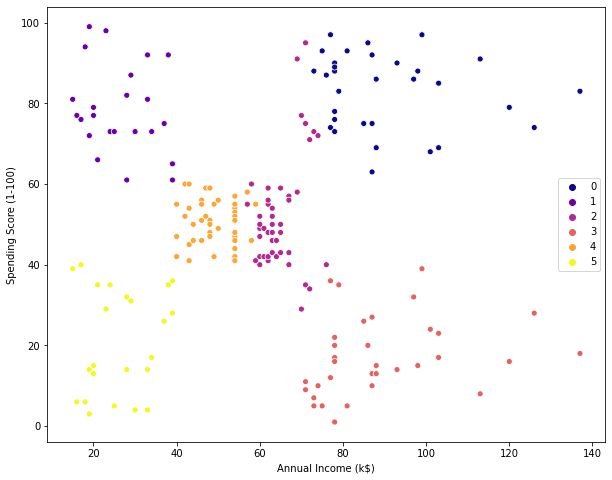

In [17]:
plt.figure(figsize=(10,8)) # clusters of customers can be viewed
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=labels,palette='plasma',legend='full')

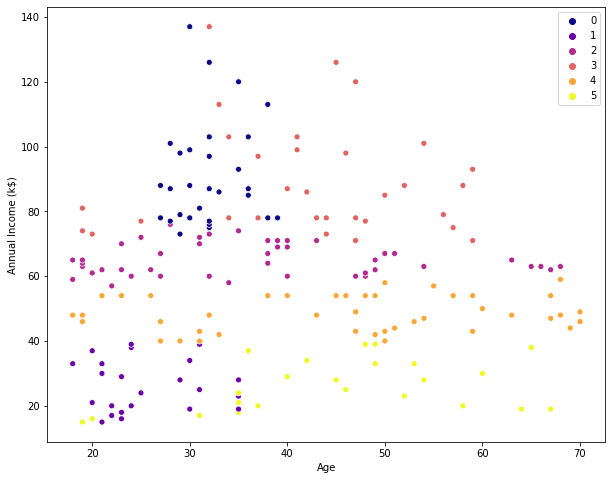

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Age'],df['Annual Income (k$)'],hue=labels,palette='plasma',legend='full')

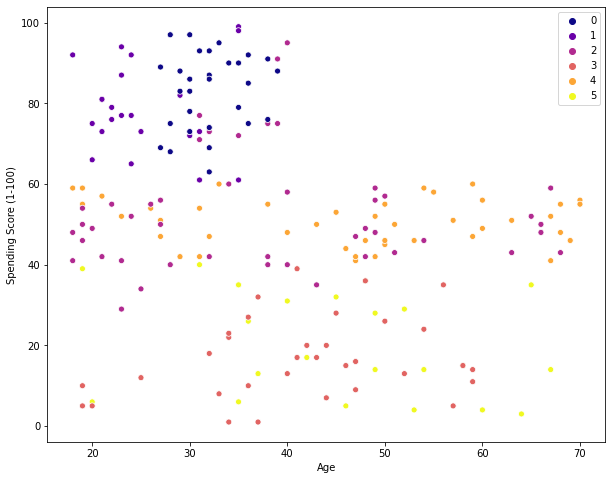

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Age'],df['Spending Score (1-100)'],hue=labels,palette='plasma',legend='full')

## Principal Component Analysis

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_data = scaler.transform(df)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_pca = pca.transform(scaled_data)

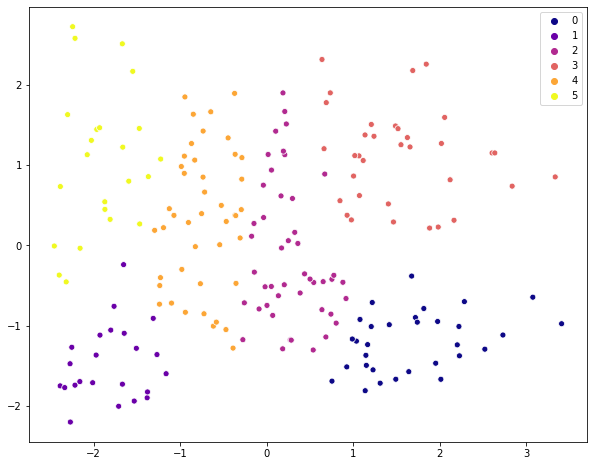

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=labels,palette='plasma',legend='full')

Observing the scatter plot of Principal Components and other pairs, the scatterplot of 'Annual Income (k$)' and 'Spending Score (1-100)' attributes is found silimar. Hence the trends of those attributes are considered for segmenting the customers.

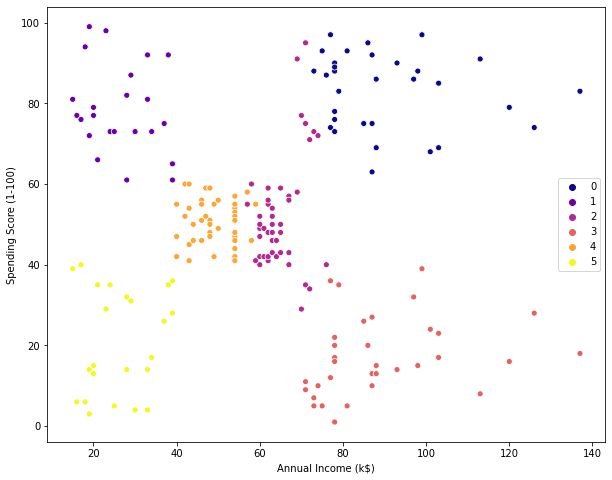

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=labels,palette='plasma',legend='full')

Clusters 2 and 4 – These clusters represent the customers with the medium annual income as well as the medium annual spend                    of salary.

Cluster 0 – This cluster represents the customers with high annual income and high spending score.

Cluster 5 – This cluster represents the customers with low annual income and low spending score.

Cluster 3 – This cluster represents the customers with high annual income and low spending score.

Cluster 1 – This cluster represents the customers with low annual income but  high spending score.